In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names, get_histplot
import seaborn as sns

In [2]:
# dataframes and merges
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')
df_referral = pd.read_csv('./vidas_data/survival_time.csv', parse_dates=['EOH', 'SOH'])
df_ps = pd.read_csv('./vidas_data/wH_DirectTable_DOLORE_MED_e_INF_VIDAS.csv', parse_dates=['TimeStamp_Insert'])
df_ps = df_ps[['IDEHR', 'EHRType', 'TimeStamp_Insert', 'Sollievo_dolore']].dropna().rename(columns={'Sollievo_dolore': 'pain_relief'})
df_pa = pd.merge(df_referral, df_ps, on=['IDEHR', 'EHRType']).dropna().sort_values(by=['IDEHR', 'TimeStamp_Insert'], ascending=[True, True]).reset_index(drop=True)

In [3]:
df_pa

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,pain_relief
0,1375,2017-01-19 12:00:00,EHR,2015-10-01 09:30:19.710,476.0,Palliative (Non-Malignant),10,2015-10-29 14:52:42.597,70%#7
1,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-10 11:12:02.063,90%#9
2,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-10 17:16:59.183,90%#9
3,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-11 03:27:36.353,100% - Sollievo totale#10
4,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-11 03:35:21.460,100% - Sollievo totale#10
...,...,...,...,...,...,...,...,...,...
88387,29090,2020-07-16 00:00:01,AMB,2020-06-25 16:51:30.637,20.0,GI Tract,1539,2020-07-14 13:56:19.160,90%#9
88388,29147,2020-07-03 03:00:06,AMB,2020-06-29 16:51:34.273,3.0,Palliative (Non-Malignant),5849,2020-06-30 12:47:54.043,90%#9
88389,29258,2020-07-16 05:00:46,AMB,2020-07-07 11:58:21.533,8.0,Lung,1623,2020-07-13 10:29:34.797,80%#8
88390,29258,2020-07-16 05:00:46,AMB,2020-07-07 11:58:21.533,8.0,Lung,1623,2020-07-14 11:14:53.943,80%#8


In [4]:
df_pa.pain_relief.unique()

array(['70%#7', '90%#9', '100% - Sollievo totale#10', '80%#8',
       '0% - Nessun sollievo#0', 'N.R.', '60%#6', '50%#5', '30%#3',
       '20%#2', '40%#4', '10%#1'], dtype=object)

In [5]:
# clean up pain relief entries
df_pa.loc[df_pa['pain_relief'] == 'N.R.', 'pain_relief'] = np.nan
df_pa['pain_relief'] = df_pa.pain_relief.str.findall('(\d+)\%')
df_pa['pain_relief'] = df_pa['pain_relief'].apply(lambda x: np.nan if isinstance(x, float) else int(x[0]))
df_pa = df_pa.dropna()

In [6]:
# display dframe
df_pa

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,pain_relief
0,1375,2017-01-19 12:00:00,EHR,2015-10-01 09:30:19.710,476.0,Palliative (Non-Malignant),10,2015-10-29 14:52:42.597,70.0
1,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-10 11:12:02.063,90.0
2,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-10 17:16:59.183,90.0
3,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-11 03:27:36.353,100.0
4,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-11 03:35:21.460,100.0
...,...,...,...,...,...,...,...,...,...
88387,29090,2020-07-16 00:00:01,AMB,2020-06-25 16:51:30.637,20.0,GI Tract,1539,2020-07-14 13:56:19.160,90.0
88388,29147,2020-07-03 03:00:06,AMB,2020-06-29 16:51:34.273,3.0,Palliative (Non-Malignant),5849,2020-06-30 12:47:54.043,90.0
88389,29258,2020-07-16 05:00:46,AMB,2020-07-07 11:58:21.533,8.0,Lung,1623,2020-07-13 10:29:34.797,80.0
88390,29258,2020-07-16 05:00:46,AMB,2020-07-07 11:58:21.533,8.0,Lung,1623,2020-07-14 11:14:53.943,80.0


In [7]:
# generate statstics on the observations
df_pa.pain_relief.value_counts()

100.0    54912
90.0     23244
80.0      7630
70.0      1677
60.0       494
50.0       219
40.0        90
0.0         46
30.0        44
20.0        29
10.0         2
Name: pain_relief, dtype: int64

In [8]:
dft = df_pa[['IDEHR', 'TimeStamp_Insert']].groupby(by=['IDEHR']).agg({'TimeStamp_Insert': [np.min, np.max]}).reset_index()
dft['time_diff'] = pd.to_timedelta(dft['TimeStamp_Insert'].amax - dft['TimeStamp_Insert'].amin).dt.days
dft

IDEHR        TimeStamp_Insert                         time_diff
                               amin                    amax          
0      1375 2015-10-29 14:52:42.597 2015-10-29 14:52:42.597         0
1      1382 2015-10-10 11:12:02.063 2015-10-27 05:36:51.337        16
2      1403 2015-10-02 14:10:39.983 2015-10-08 14:23:20.083         6
3      1414 2015-10-03 13:30:54.227 2015-10-05 03:09:53.123         1
4      1421 2015-10-09 13:15:03.297 2015-10-18 05:50:06.340         8
...     ...                     ...                     ...       ...
3073  29045 2020-06-29 09:23:32.767 2020-07-04 11:50:13.070         5
3074  29088 2020-07-01 11:26:41.870 2020-07-10 11:15:12.470         8
3075  29090 2020-07-10 11:21:14.797 2020-07-14 13:56:19.160         4
3076  29147 2020-06-30 12:47:54.043 2020-06-30 12:47:54.043         0
3077  29258 2020-07-13 10:29:34.797 2020-07-14 11:38:49.433         1

[3078 rows x 4 columns]

In [9]:
with pd.option_context('display.max_rows', 500):
    print(dft.time_diff.value_counts())

0       387
1       157
2       142
3       135
4       113
6       110
7        90
10       82
5        79
8        65
14       65
9        63
13       63
20       58
12       57
11       54
19       44
15       44
24       43
17       40
16       39
22       37
21       37
23       32
18       31
28       31
30       28
35       28
26       27
31       26
27       25
29       24
38       24
25       23
41       22
33       22
37       21
34       20
42       18
40       18
55       17
36       17
39       17
45       16
49       16
43       16
32       15
76       13
46       13
56       12
52       12
48       11
53       11
63       11
59       10
51       10
50        8
66        8
57        8
47        8
54        7
67        7
71        7
44        7
98        6
69        6
77        6
81        6
93        6
61        6
94        6
64        6
68        6
135       5
90        5
58        5
86        5
107       5
72        5
99        5
89        4
124       4
82        4
87  

In [10]:
# get the no. of days spent in hospice as a column for each IDEHR
df_pa['hos_days'] = pd.to_timedelta(df_pa['TimeStamp_Insert'] - df_pa['SOH']).dt.days
df_pa.astype({'hos_days': 'float32'}).dtypes

<ipython-input-10-02adb53b1c36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pa['hos_days'] = pd.to_timedelta(df_pa['TimeStamp_Insert'] - df_pa['SOH']).dt.days


IDEHR                          int64
EOH                   datetime64[ns]
EHRType                       object
SOH                   datetime64[ns]
survival_time_days           float64
Diagnosis                     object
Diag_Ref                       int64
TimeStamp_Insert      datetime64[ns]
pain_relief                  float64
hos_days                     float32
dtype: object

In [11]:
df_pa

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,pain_relief,hos_days
0,1375,2017-01-19 12:00:00,EHR,2015-10-01 09:30:19.710,476.0,Palliative (Non-Malignant),10,2015-10-29 14:52:42.597,70.0,28
1,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-10 11:12:02.063,90.0,28
2,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-10 17:16:59.183,90.0,28
3,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-11 03:27:36.353,100.0,29
4,1382,2015-10-27 08:25:00,EHR,2015-09-11 17:39:52.193,45.0,Palliative (Non-Malignant),667,2015-10-11 03:35:21.460,100.0,29
...,...,...,...,...,...,...,...,...,...,...
88387,29090,2020-07-16 00:00:01,AMB,2020-06-25 16:51:30.637,20.0,GI Tract,1539,2020-07-14 13:56:19.160,90.0,18
88388,29147,2020-07-03 03:00:06,AMB,2020-06-29 16:51:34.273,3.0,Palliative (Non-Malignant),5849,2020-06-30 12:47:54.043,90.0,0
88389,29258,2020-07-16 05:00:46,AMB,2020-07-07 11:58:21.533,8.0,Lung,1623,2020-07-13 10:29:34.797,80.0,5
88390,29258,2020-07-16 05:00:46,AMB,2020-07-07 11:58:21.533,8.0,Lung,1623,2020-07-14 11:14:53.943,80.0,6


In [12]:
df_pa = df_pa[['IDEHR', 'EHRType', 'survival_time_days', 'Diagnosis', 'pain_relief', 'hos_days']].drop_duplicates().groupby(by=['IDEHR', 'EHRType', 'survival_time_days', 'Diagnosis', 'hos_days']).mean().reset_index()
df_pa

,IDEHR,EHRType,survival_time_days,Diagnosis,hos_days,pain_relief
0,1375,EHR,476.0,Palliative (Non-Malignant),28,70.0
1,1382,EHR,45.0,Palliative (Non-Malignant),28,90.0
2,1382,EHR,45.0,Palliative (Non-Malignant),29,100.0
3,1382,EHR,45.0,Palliative (Non-Malignant),30,100.0
4,1382,EHR,45.0,Palliative (Non-Malignant),31,100.0
...,...,...,...,...,...,...
45273,29090,AMB,20.0,GI Tract,17,90.0
45274,29090,AMB,20.0,GI Tract,18,90.0
45275,29147,AMB,3.0,Palliative (Non-Malignant),0,90.0
45276,29258,AMB,8.0,Lung,5,80.0


In [13]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
sns.set(font_scale=1.5)

In [14]:
# normalized pain relief across all patients
df_p1 = df_pa[['hos_days', 'pain_relief']].groupby(by=['hos_days']).mean().reset_index()
df_p1

,hos_days,pain_relief
0,0,92.088424
1,1,92.440015
2,2,93.254701
3,3,93.534972
4,4,93.754014
...,...,...
835,1386,90.000000
836,1394,90.000000
837,1403,90.000000
838,1409,90.000000


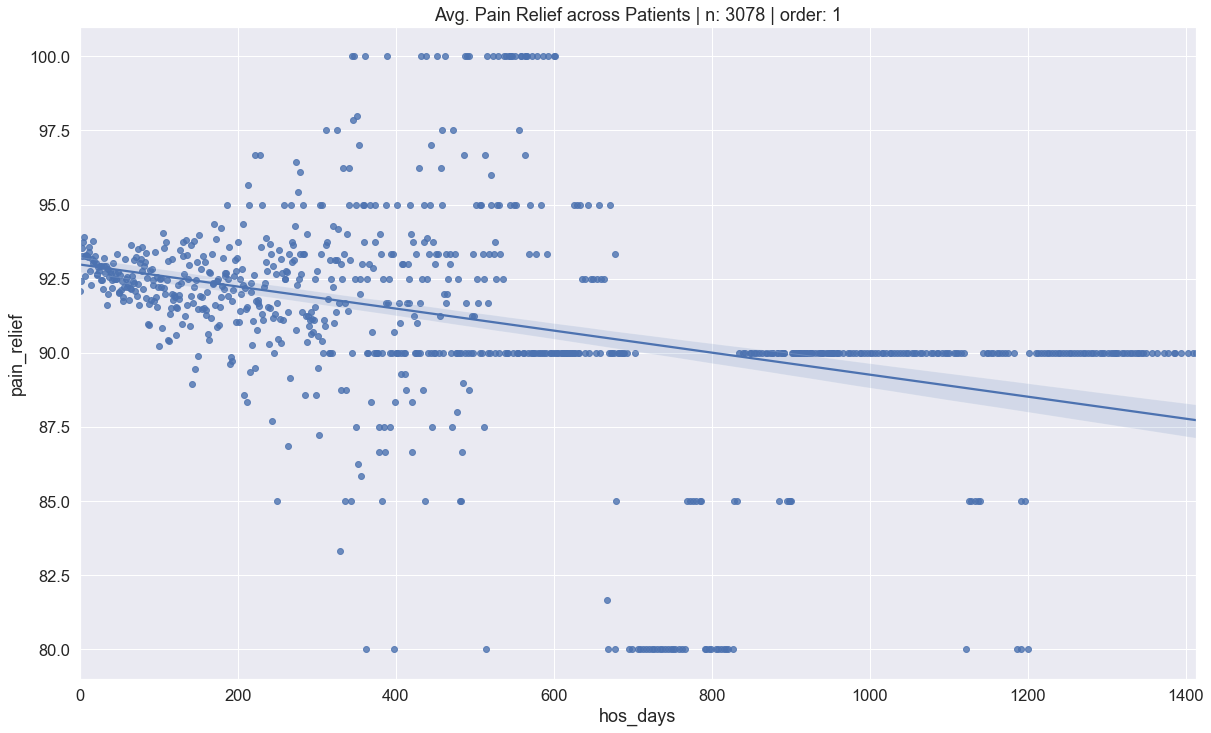

In [15]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p1, ax=ax, order=1)
ax.set_title('Avg. Pain Relief across Patients | n: ' + str(len(df_pa.IDEHR.unique())) + ' | order: 1')
plt.show()

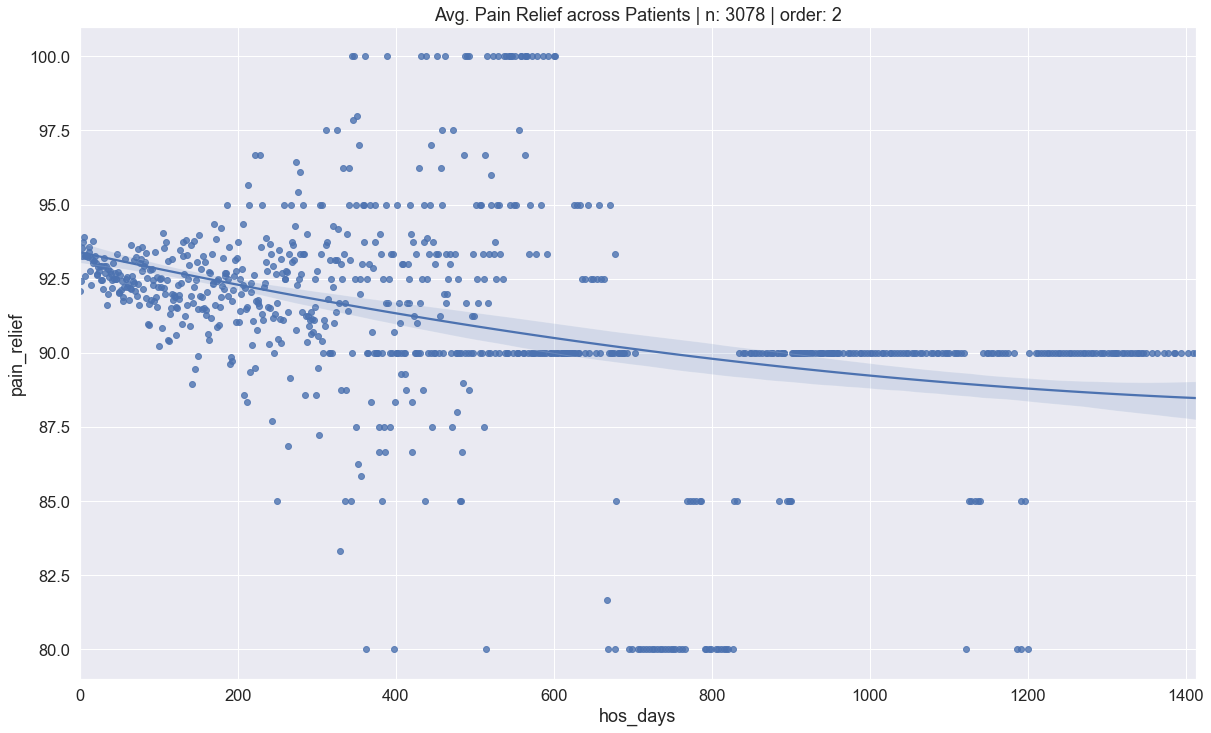

In [16]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p1, ax=ax, order=2)
ax.set_title('Avg. Pain Relief across Patients | n: ' + str(len(df_pa.IDEHR.unique())) + ' | order: 2')
plt.show()

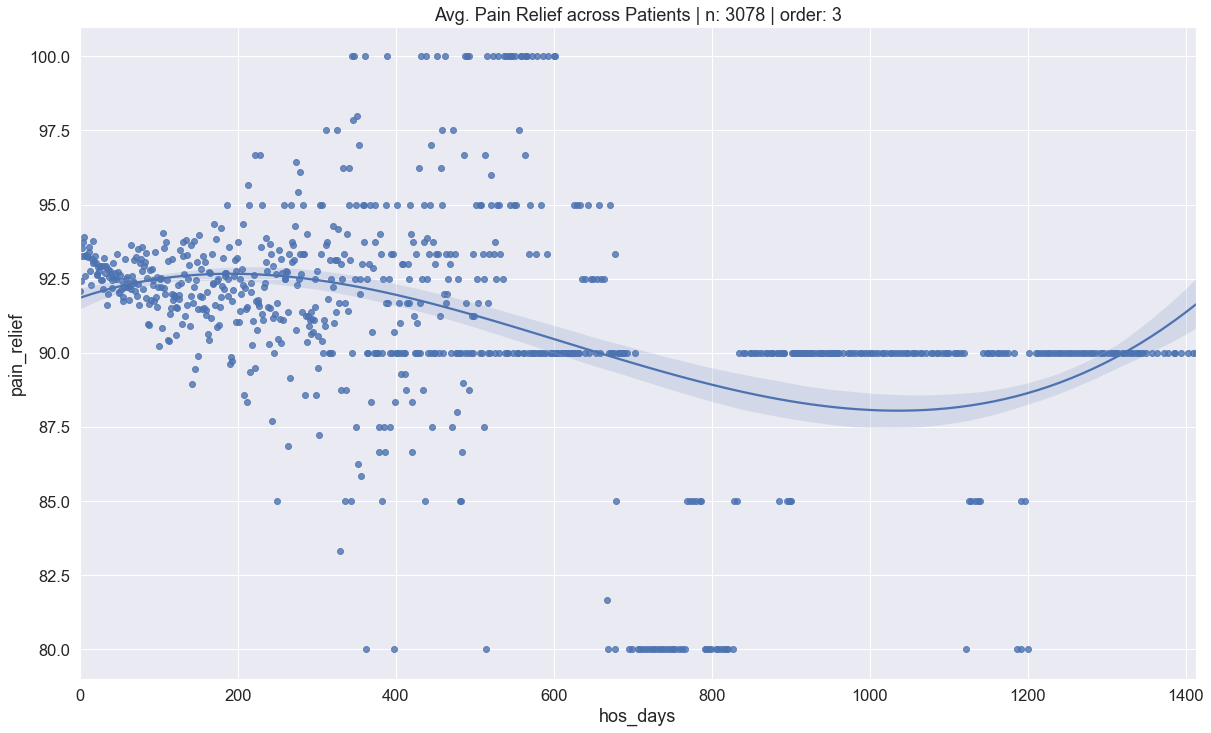

In [17]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p1, ax=ax, order=3)
ax.set_title('Avg. Pain Relief across Patients | n: ' + str(len(df_pa.IDEHR.unique())) + ' | order: 3')
plt.show()

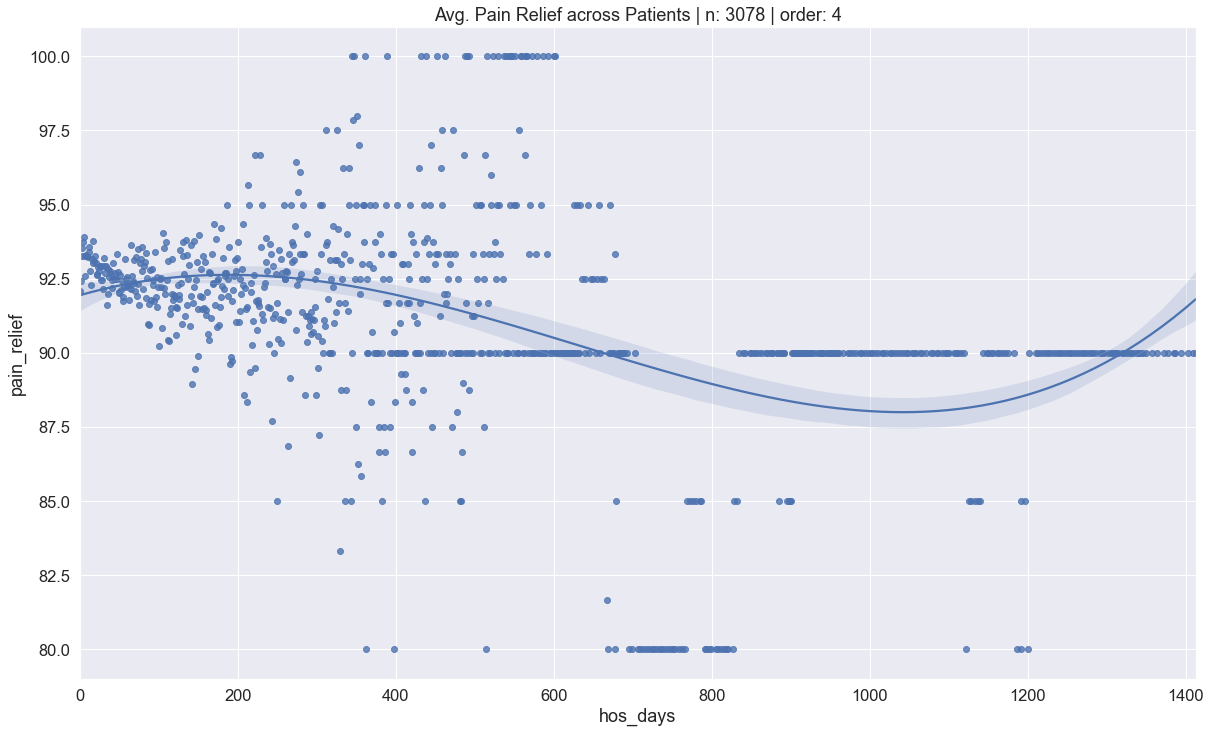

In [18]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p1, ax=ax, order=4)
ax.set_title('Avg. Pain Relief across Patients | n: ' + str(len(df_pa.IDEHR.unique())) + ' | order: 4')
plt.show()

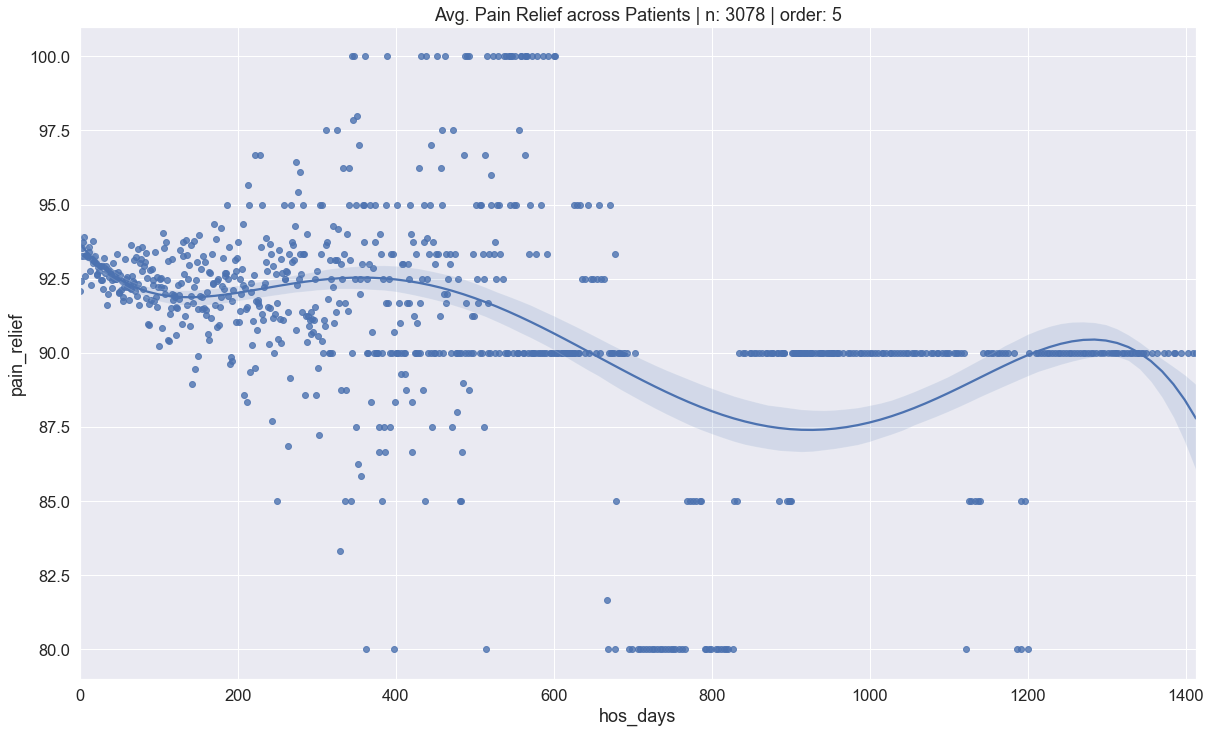

In [19]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p1, ax=ax, order=5)
ax.set_title('Avg. Pain Relief across Patients | n: ' + str(len(df_pa.IDEHR.unique())) + ' | order: 5')
plt.show()

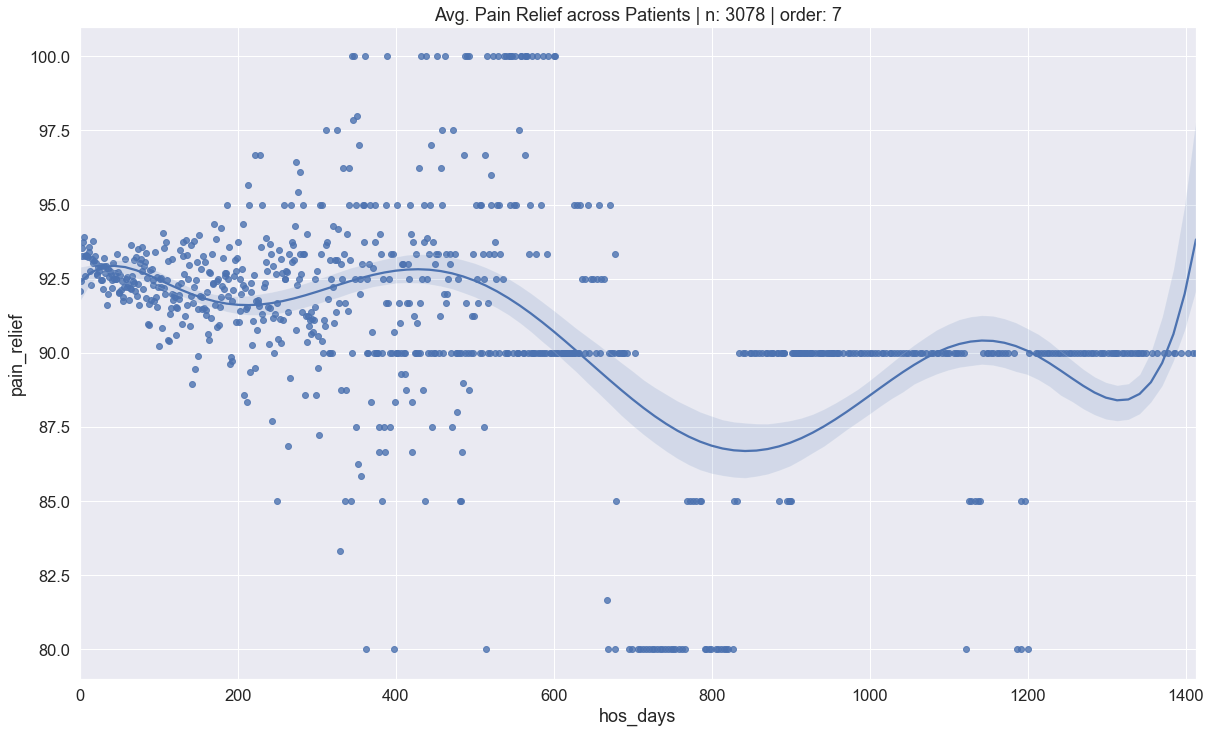

In [20]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p1, ax=ax, order=7)
ax.set_title('Avg. Pain Relief across Patients | n: ' + str(len(df_pa.IDEHR.unique())) + ' | order: 7')
plt.show()

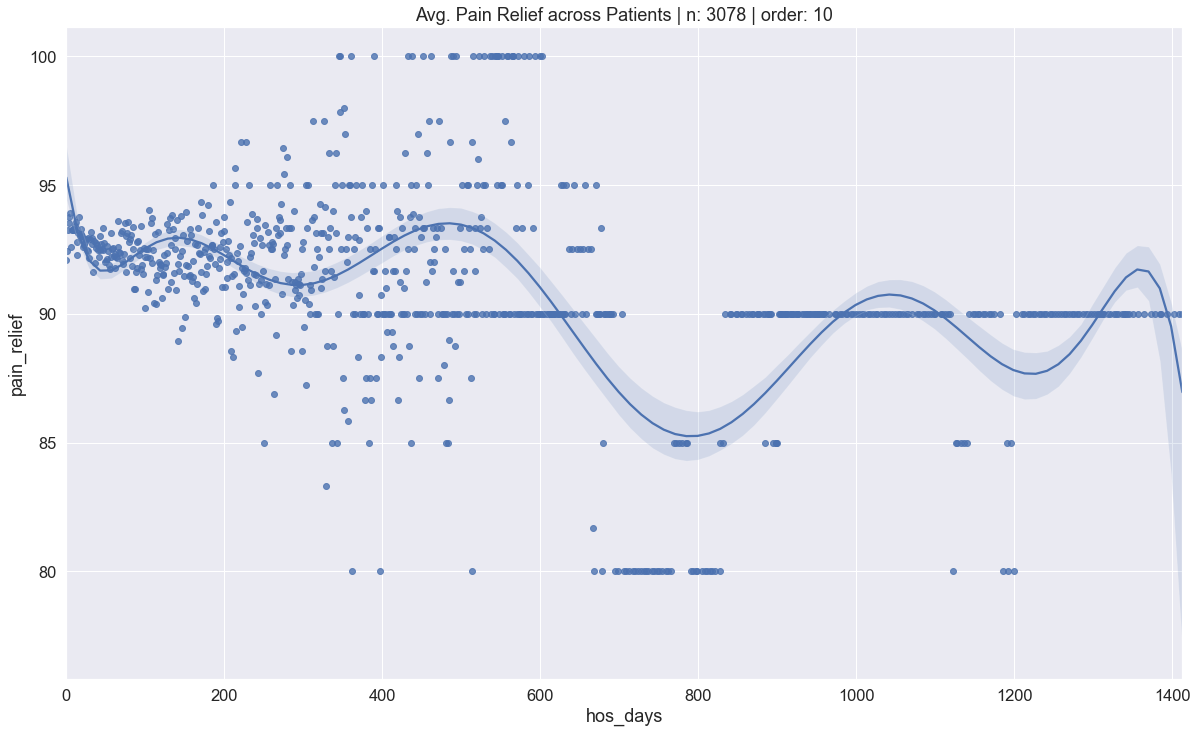

In [21]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p1, ax=ax, order=10)
ax.set_title('Avg. Pain Relief across Patients | n: ' + str(len(df_pa.IDEHR.unique())) + ' | order: 10')
plt.show()

In [22]:
# pain relief of patients surviving atleast x days
s_time = 30
df_p2 = df_pa[df_pa['survival_time_days'] >= s_time]
df_p2 = df_p2[df_p2['hos_days'] <= s_time]
p_num = len(df_p2.IDEHR.unique())
df_p2 = df_p2[['hos_days', 'pain_relief']].groupby(by=['hos_days']).mean().reset_index()

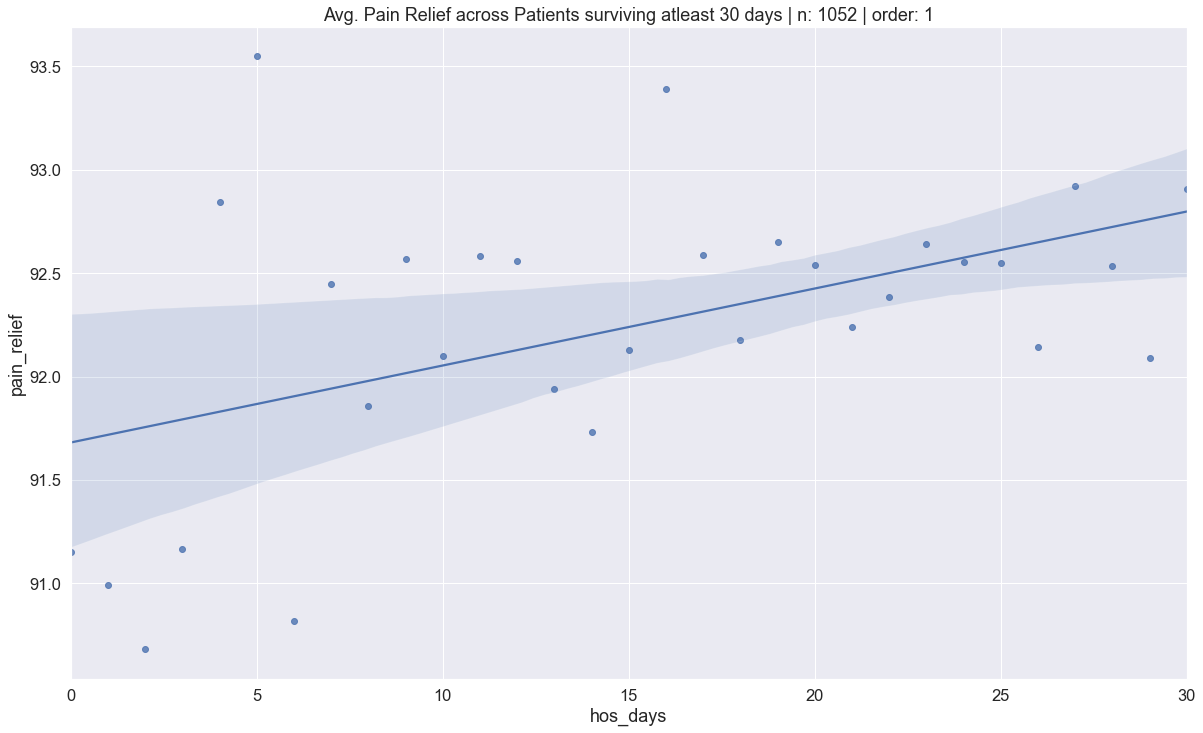

In [23]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p2, ax=ax, order=1)
ax.set_title('Avg. Pain Relief across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1')
plt.show()

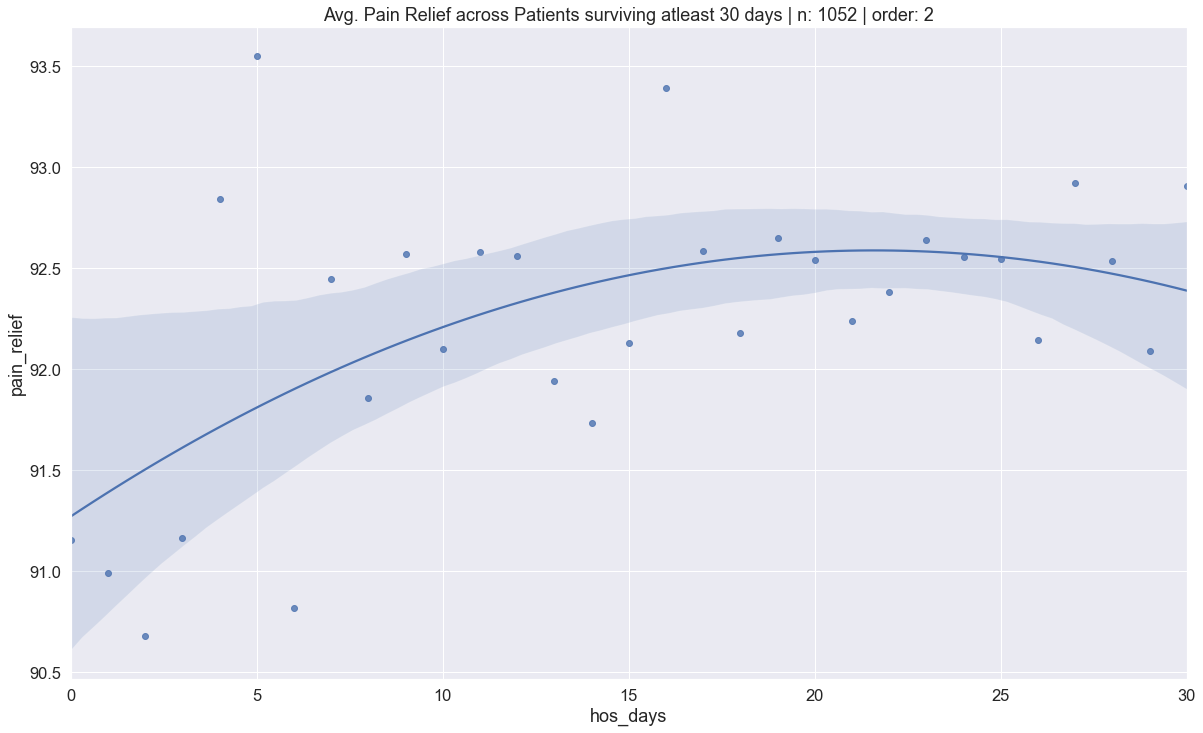

In [24]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p2, ax=ax, order=2)
ax.set_title('Avg. Pain Relief across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 2')
plt.show()

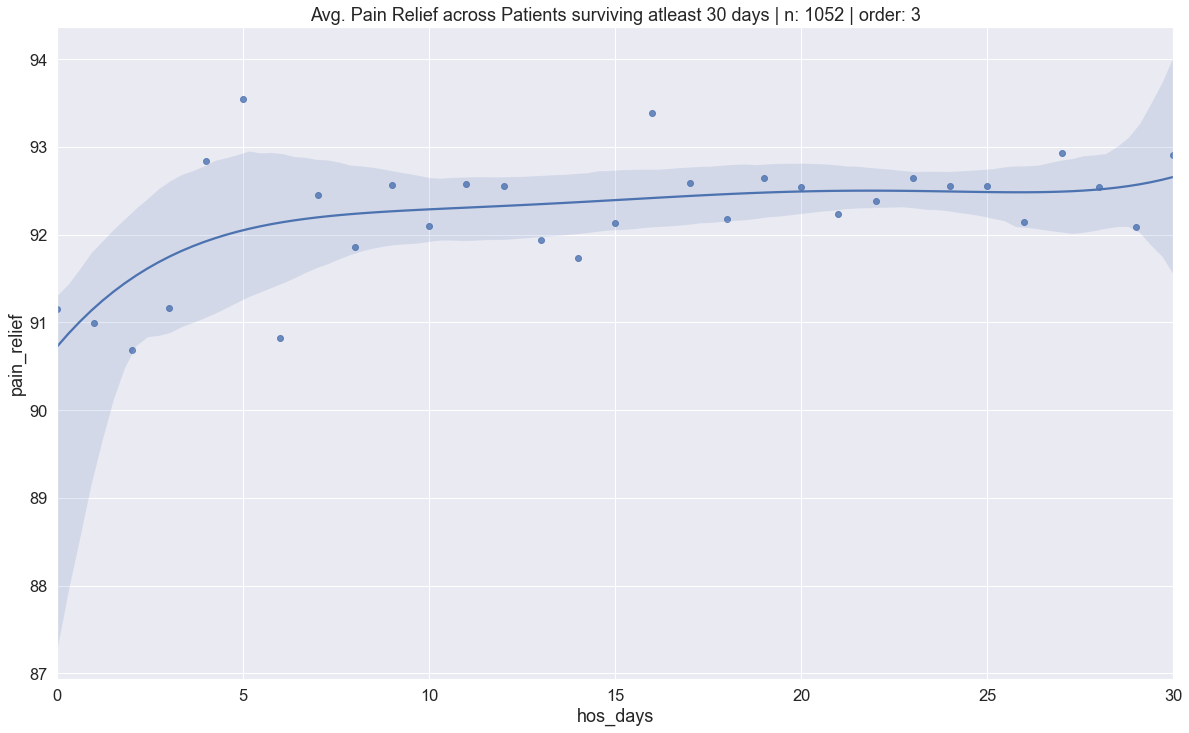

In [25]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p2, ax=ax, order=5)
ax.set_title('Avg. Pain Relief across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 3')
plt.show()

In [26]:
# pain relief of patients surviving atleast x days
s_time = 60
df_p2 = df_pa[df_pa['survival_time_days'] >= s_time]
df_p2 = df_p2[df_p2['hos_days'] <= s_time]
p_num = len(df_p2.IDEHR.unique())
df_p2 = df_p2[['hos_days', 'pain_relief']].groupby(by=['hos_days']).mean().reset_index()

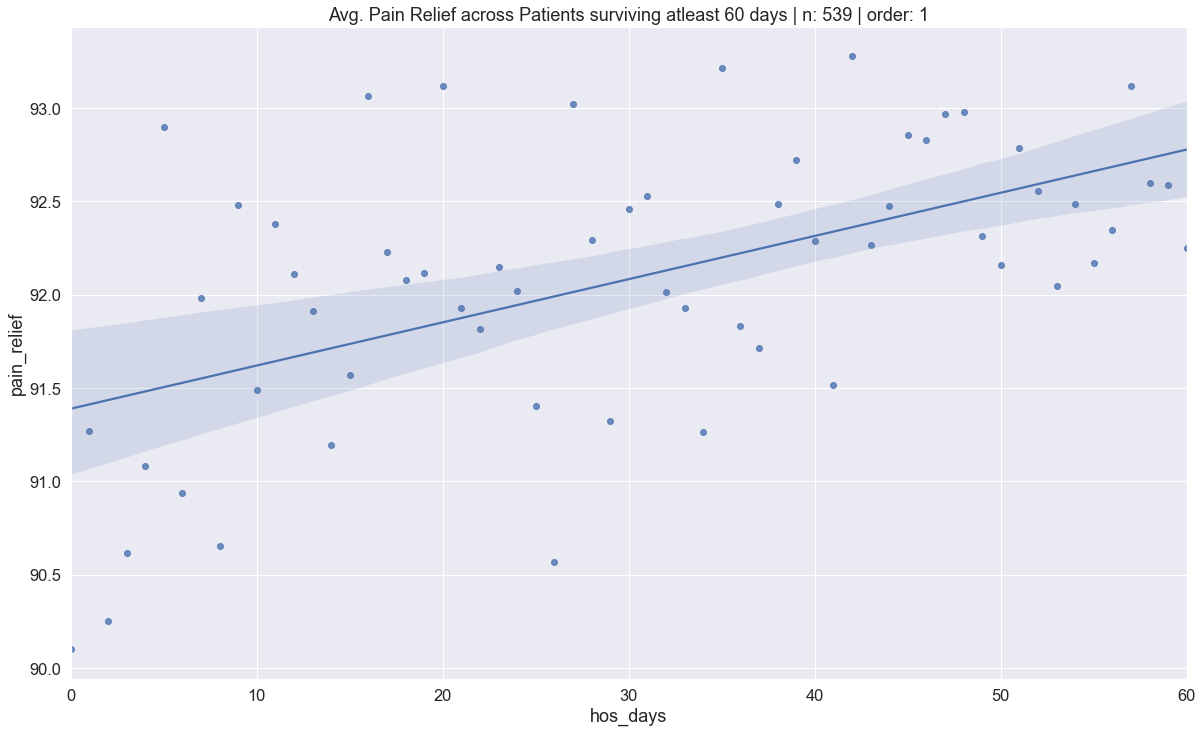

In [27]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p2, ax=ax, order=1)
ax.set_title('Avg. Pain Relief across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1')
plt.show()

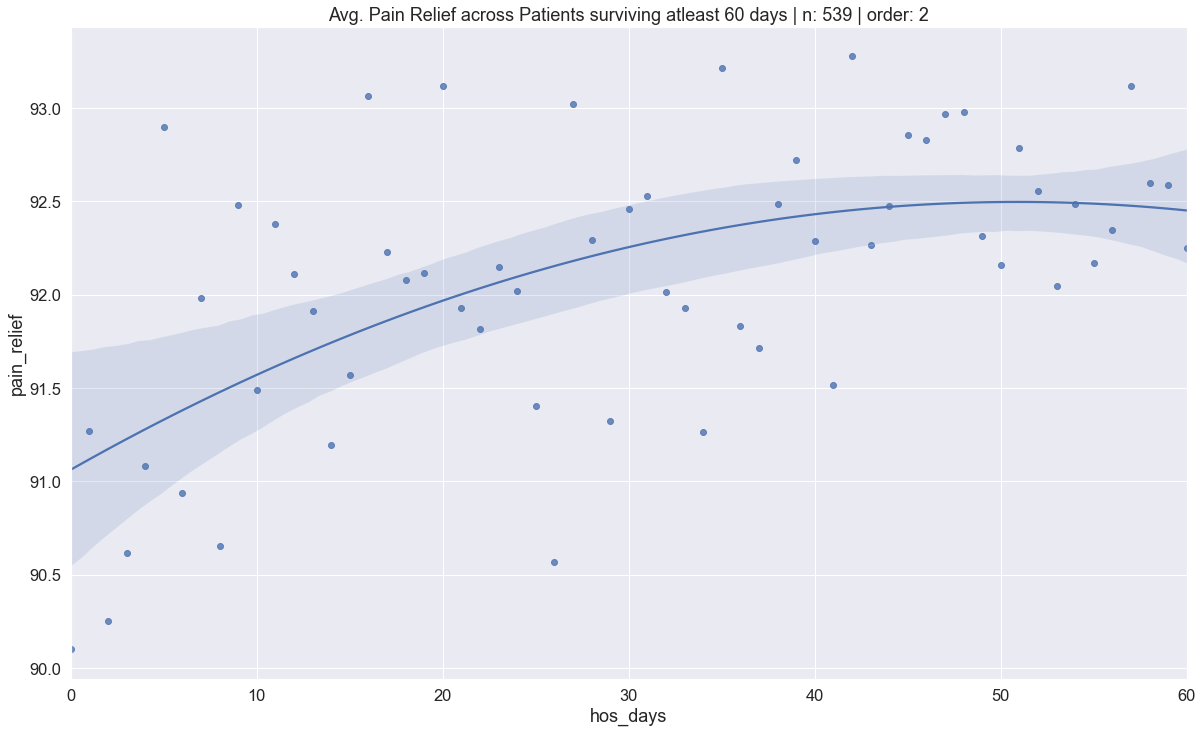

In [28]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p2, ax=ax, order=2)
ax.set_title('Avg. Pain Relief across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 2')
plt.show()

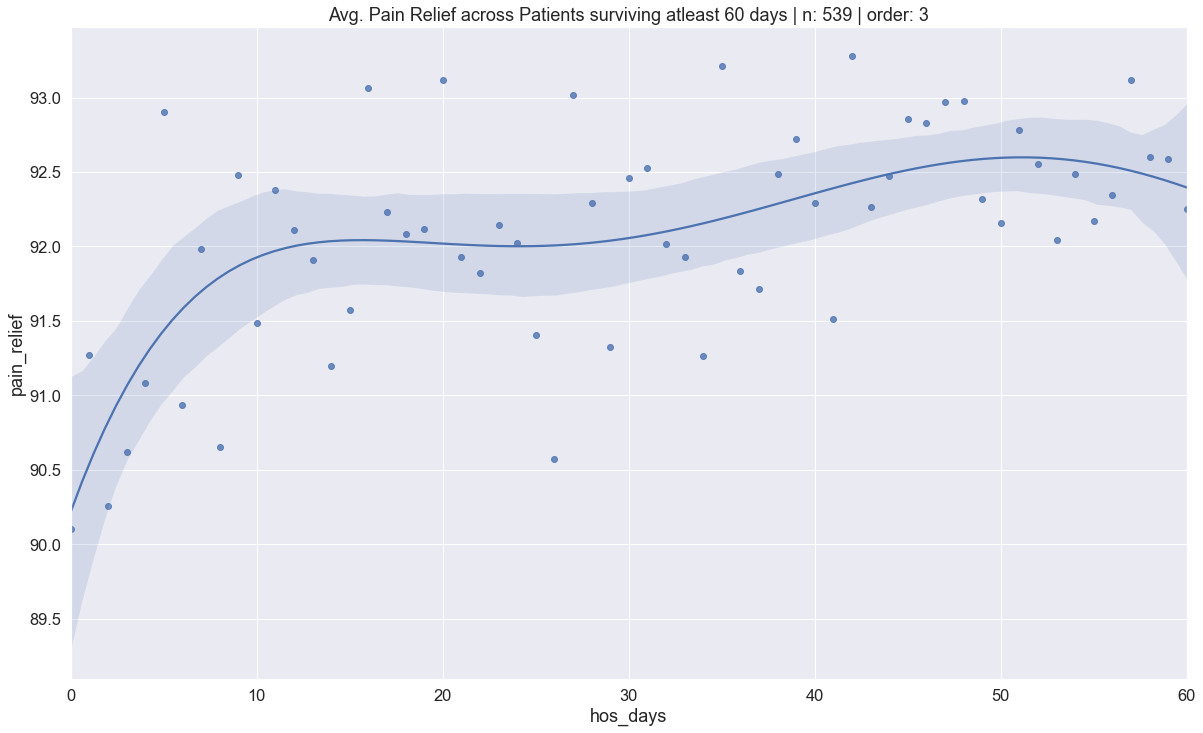

In [29]:
ax = plt.axes()
sns.regplot(x='hos_days', y='pain_relief', data=df_p2, ax=ax, order=5)
ax.set_title('Avg. Pain Relief across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 3')
plt.show()

In [30]:
# pain relief split by EHRType
df_p3 = df_pa[['EHRType', 'hos_days', 'pain_relief']].groupby(by=['EHRType', 'hos_days']).mean().reset_index()
df_p3

,EHRType,hos_days,pain_relief
0,AMB,0,88.562753
1,AMB,1,88.243243
2,AMB,2,87.050147
3,AMB,3,87.935323
4,AMB,4,88.656542
...,...,...,...
974,EHR,134,100.000000
975,EHR,135,90.000000
976,EHR,136,100.000000
977,EHR,137,100.000000


Text(0.5, 0.98, 'Avg. Pain Relief across Patients by EHRType | n (EHR): 1096 | n (AMB): 2014 | order: 2')

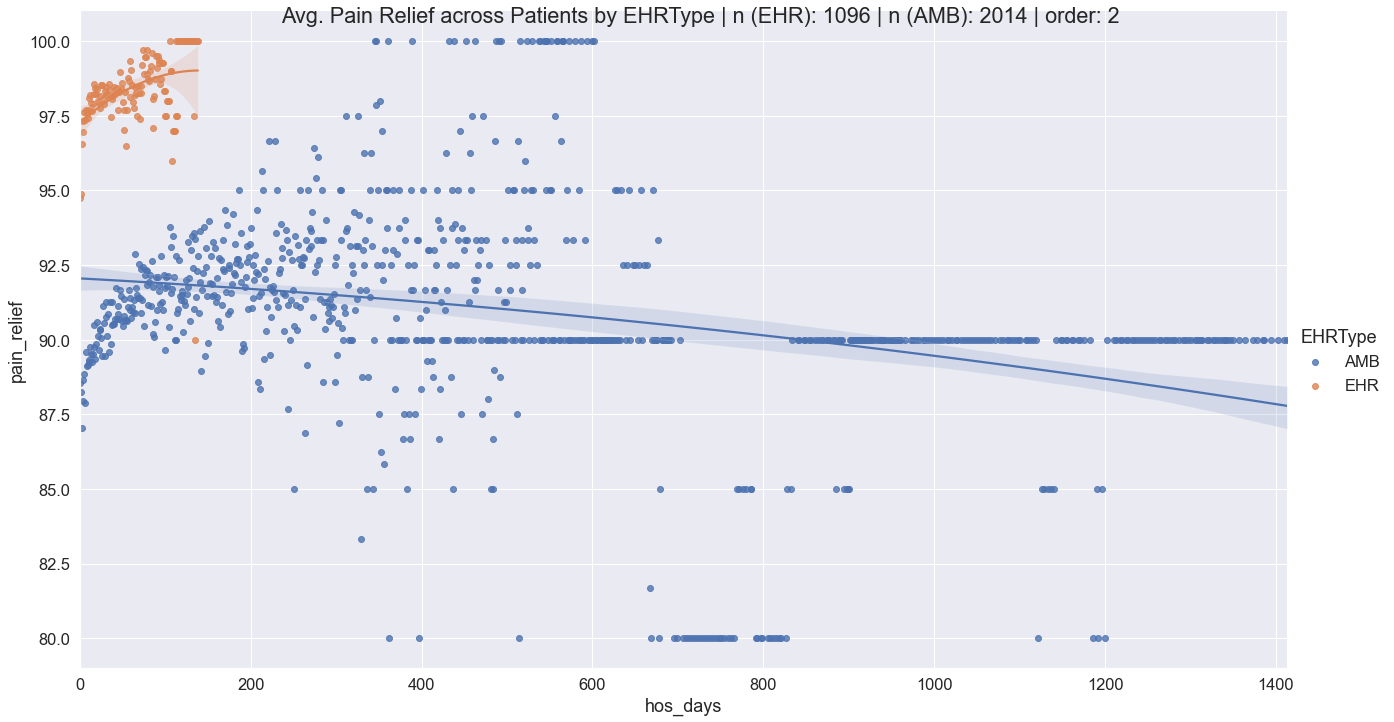

In [31]:
e_num = len(df_pa[df_pa['EHRType'] == 'EHR'].IDEHR.unique())
a_num = len(df_pa[df_pa['EHRType'] == 'AMB'].IDEHR.unique())
sns.lmplot(x='hos_days', y='pain_relief', hue='EHRType', data=df_p3, order=2, height=10, aspect=1.8).fig.suptitle('Avg. Pain Relief across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | order: 2')

In [32]:
df_pa[['EHRType', 'survival_time_days', 'hos_days']].groupby(by=['EHRType']).agg({'survival_time_days': [np.min, np.max, np.mean], 'hos_days': [np.min, np.max, np.mean]})

survival_time_days                     hos_days                 
                      amin    amax        mean     amin  amax       mean
EHRType                                                                 
AMB                    0.0  1416.0  148.442995        0  1413  77.681734
EHR                    0.0   476.0   37.425993        0   138  19.689937

Text(0.5, 0.98, 'Avg. Pain Relief across Patients by EHRType | n (EHR): 1096 | n (AMB): 2014 | order: 2')

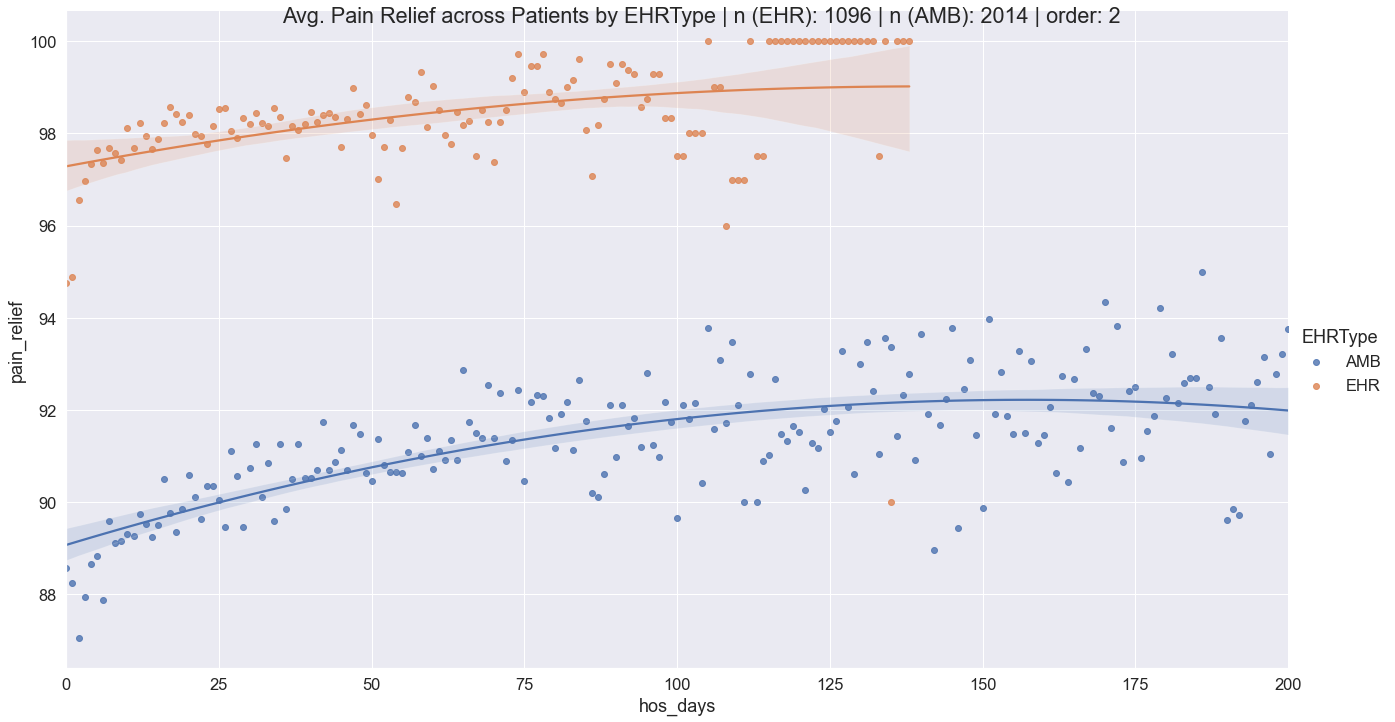

In [33]:
# pain relief split by EHRType for first 200 days
df_p3 = df_p3[df_p3['hos_days'] <= 200]
sns.lmplot(x='hos_days', y='pain_relief', hue='EHRType', data=df_p3, order=2, height=10, aspect=1.8).fig.suptitle('Avg. Pain Relief across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | order: 2')

In [34]:
# pain relief split by setting
print(len(df_pa.IDEHR.unique()))
df_set = pd.read_excel('./vidas_data/IDEHR-EHRType-OU.xlsx')
df_set = df_set.rename(columns={"UO (Setting)\n": 'Setting'})
df_st = pd.merge(df_pa, df_set, on=['IDEHR', 'EHRType'])
print(len(df_st.IDEHR.unique()))
df_st

3078
3078


,IDEHR,EHRType,survival_time_days,Diagnosis,hos_days,pain_relief,PatientID,Setting
0,1375,EHR,476.0,Palliative (Non-Malignant),28,70.0,80,Hospice
1,1382,EHR,45.0,Palliative (Non-Malignant),28,90.0,30759,Hospice
2,1382,EHR,45.0,Palliative (Non-Malignant),29,100.0,30759,Hospice
3,1382,EHR,45.0,Palliative (Non-Malignant),30,100.0,30759,Hospice
4,1382,EHR,45.0,Palliative (Non-Malignant),31,100.0,30759,Hospice
...,...,...,...,...,...,...,...,...
45273,29090,AMB,20.0,GI Tract,17,90.0,59768,Domicilio
45274,29090,AMB,20.0,GI Tract,18,90.0,59768,Domicilio
45275,29147,AMB,3.0,Palliative (Non-Malignant),0,90.0,59800,Domicilio
45276,29258,AMB,8.0,Lung,5,80.0,59844,Domicilio


In [35]:
df_p5 = df_st[['Setting', 'hos_days', 'pain_relief']].groupby(by=['Setting', 'hos_days']).mean().reset_index()
df_p5

,Setting,hos_days,pain_relief
0,Domicilio,0,88.483607
1,Domicilio,1,88.172205
2,Domicilio,2,87.050147
3,Domicilio,3,87.935323
4,Domicilio,4,88.656542
...,...,...,...
1036,Hospice Pediatrico,18,86.666667
1037,Hospice Pediatrico,19,90.000000
1038,Hospice Pediatrico,20,90.000000
1039,Hospice Pediatrico,21,90.000000


In [36]:
df_st[['Setting', 'survival_time_days', 'hos_days']].groupby(by=['Setting']).agg({'survival_time_days': [np.min, np.max, np.mean], 'hos_days': [np.min, np.max, np.mean]})

survival_time_days                     hos_days        \
                                   amin    amax        mean     amin  amax   
Setting                                                                      
Domicilio                           0.0  1416.0  148.527070        0  1413   
Domicilio Pediatrico                3.0   205.0   86.325581        0   194   
Hospice                             0.0   476.0   37.510664        0   138   
Hospice Pediatrico                  0.0    23.0   16.781818        0    22   

                                 
                           mean  
Setting                          
Domicilio             77.715140  
Domicilio Pediatrico  53.000000  
Hospice               19.734899  
Hospice Pediatrico     8.727273

In [38]:
df_st[['IDEHR', 'Setting']].groupby(by=['Setting']).agg(['nunique'])

,IDEHR
,nunique
Setting,
Domicilio,2005
Domicilio Pediatrico,9
Hospice,1091
Hospice Pediatrico,5


Text(0.5, 0.98, 'Avg. Pain Relief across Patients by Setting | n (D): 2005 | n (DP): 9 | n (H): 1091 | n (HP): 5 | order: 2')

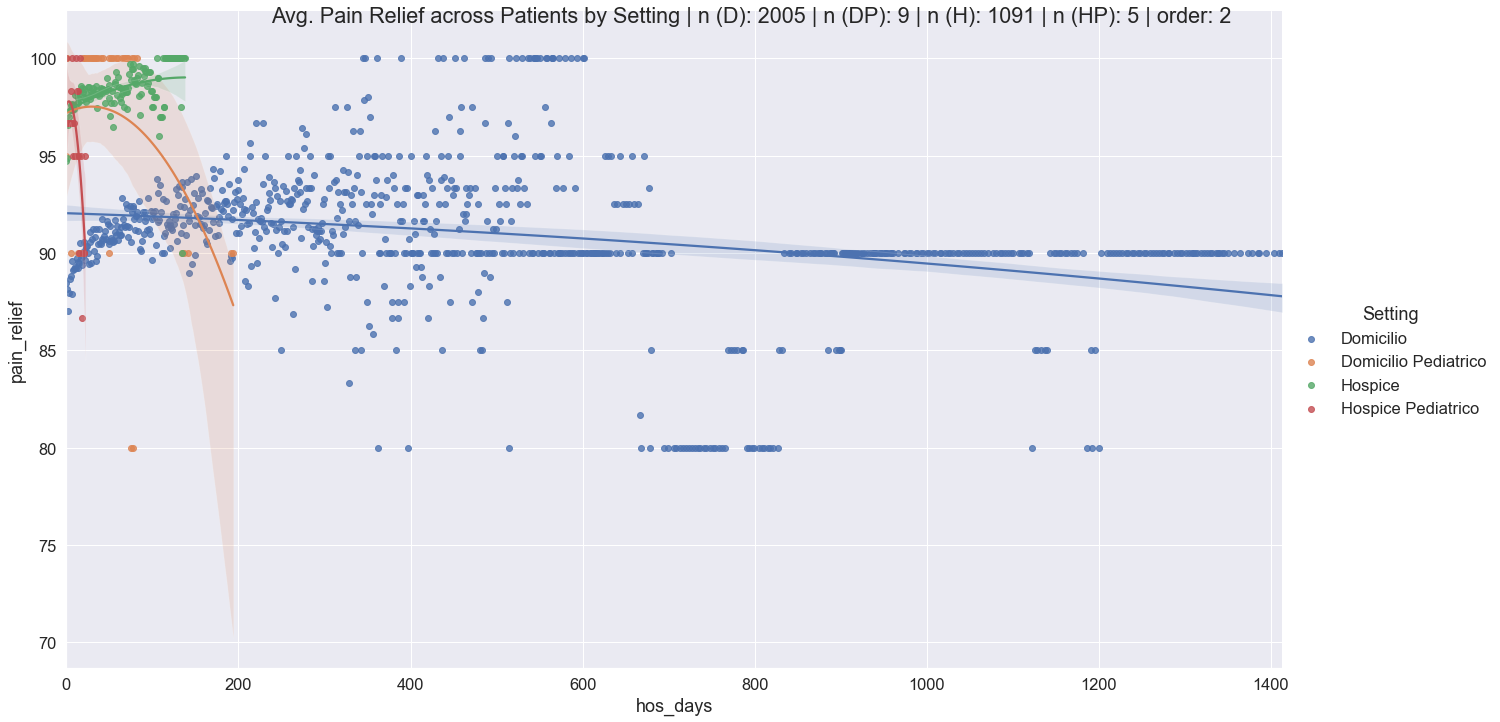

In [39]:
d_num = len(df_st[df_st['Setting'] == 'Domicilio'].IDEHR.unique())
dp_num = len(df_st[df_st['Setting'] == 'Domicilio Pediatrico'].IDEHR.unique())
h_num = len(df_st[df_st['Setting'] == 'Hospice'].IDEHR.unique())
hp_num = len(df_st[df_st['Setting'] == 'Hospice Pediatrico'].IDEHR.unique())
sns.lmplot(x='hos_days', y='pain_relief', hue='Setting', data=df_p5, order=2, height=10, aspect=1.8).fig.suptitle('Avg. Pain Relief across Patients by Setting | n (D): ' + str(d_num) + ' | n (DP): ' + str(dp_num) + ' | n (H): ' + str(h_num) + ' | n (HP): ' + str(hp_num) + ' | order: 2')

Text(0.5, 0.98, 'Avg. Pain Relief across Patients by Setting | n (D): 2005 | n (DP): 9 | n (H): 1091 | n (HP): 5 | order: 2')

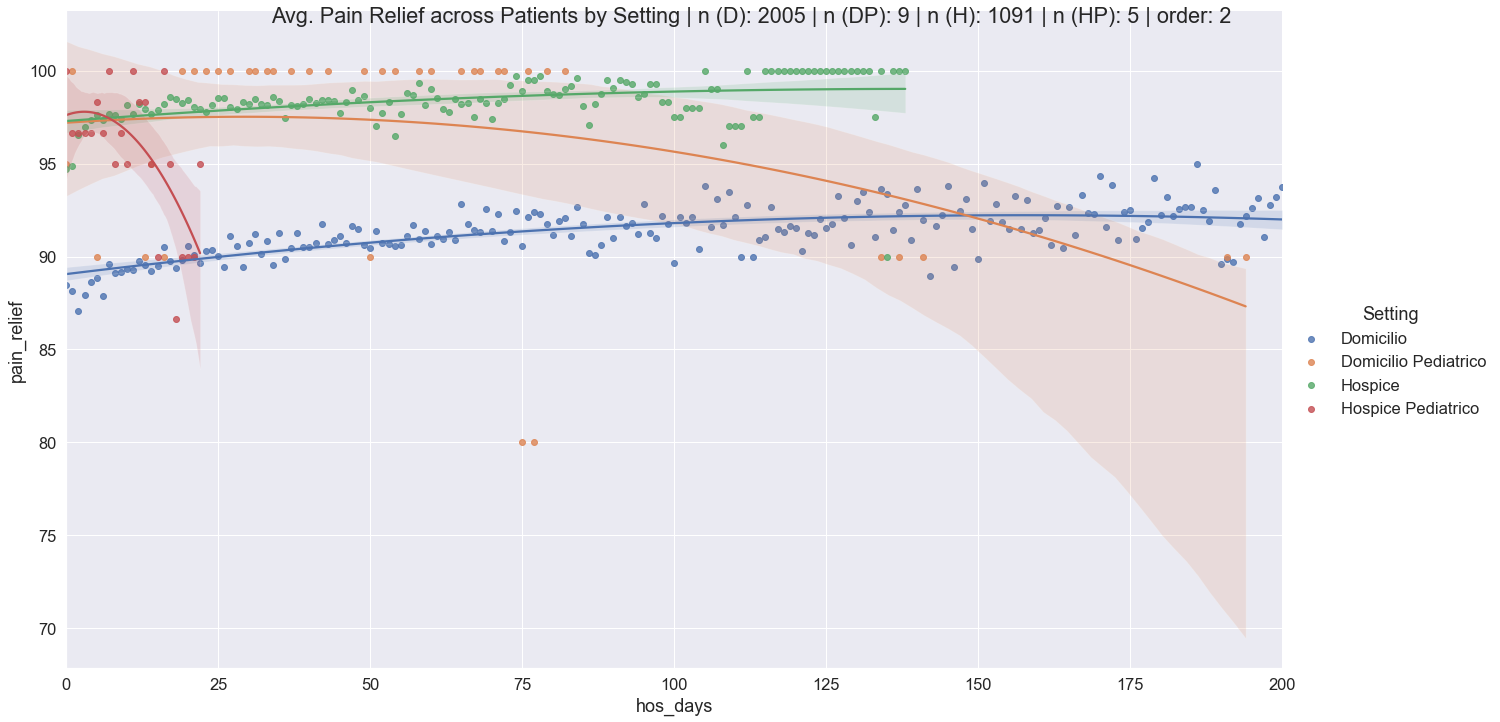

In [40]:
# Setting for only first 200 days
df_p6 = df_p5[df_p5['hos_days'] <= 200]
sns.lmplot(x='hos_days', y='pain_relief', hue='Setting', data=df_p6, order=2, height=10, aspect=1.8).fig.suptitle('Avg. Pain Relief across Patients by Setting | n (D): ' + str(d_num) + ' | n (DP): ' + str(dp_num) + ' | n (H): ' + str(h_num) + ' | n (HP): ' + str(hp_num) + ' | order: 2')

In [41]:
# heatmaps of avg pain relief across diagnosis
df_p4 = df_pa[['Diagnosis', 'hos_days', 'pain_relief']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_p4 = df_p4[df_p4['hos_days'] <= 90]
p_num = len(df_pa[df_pa['hos_days'] <= 90].IDEHR.unique())
df_p4 = df_p4.pivot(index='Diagnosis', columns='hos_days', values='pain_relief')
df_p4

hos_days,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc,96.538462,96.304348,96.041667,95.192308,96.419753,96.923077,94.833333,96.612903,97.407407,95.238095,...,100.000000,97.500000,96.000000,96.666667,97.000000,90.000000,95.000000,100.000000,97.500000,95.000000
Breast,93.214286,92.602740,93.125000,94.144737,96.266667,94.718876,92.839506,93.855422,92.012987,92.816901,...,96.250000,95.833333,90.000000,98.333333,92.727273,91.666667,90.000000,92.142857,96.111111,91.111111
Cervical-Ovarian,91.034483,92.553191,95.784314,94.435484,94.062500,94.926471,96.067708,94.375000,94.591837,91.792453,...,86.000000,92.222222,90.000000,87.500000,86.666667,80.000000,84.000000,92.000000,90.000000,83.750000
GI Tract,91.647727,91.655844,92.525562,92.748538,93.302469,93.424242,92.071006,92.460317,93.888889,93.647799,...,94.210526,95.576923,92.000000,92.777778,93.055556,91.000000,92.291667,91.875000,92.857143,92.750000
Genitourinary,90.892857,93.958333,92.457627,95.983607,94.538462,95.546875,92.628205,93.513514,96.048387,91.615385,...,91.000000,97.500000,90.909091,95.555556,90.000000,90.555556,92.777778,91.666667,93.571429,92.727273
Head-Neck,91.944444,94.133333,94.843750,93.440860,90.555556,97.954545,95.166667,95.192308,94.615385,94.400000,...,90.000000,90.000000,100.000000,100.000000,90.000000,NaN,90.000000,90.000000,90.000000,NaN
Liver-Biliary,93.055556,91.564103,95.204678,94.687500,94.076923,94.328358,93.164557,93.684211,93.823529,94.558824,...,93.000000,91.666667,91.363636,94.375000,91.250000,90.833333,92.500000,100.000000,88.750000,88.571429
Lung,91.067708,91.888889,92.727273,91.732026,92.663399,92.500000,91.600985,92.551170,91.666667,92.832370,...,93.260870,90.238095,91.956522,92.500000,92.000000,90.000000,92.142857,92.105263,88.888889,92.500000
Lymphoid_Leukemia,100.000000,100.000000,100.000000,100.000000,96.666667,93.333333,95.000000,95.000000,98.750000,95.000000,...,NaN,85.000000,NaN,90.000000,90.000000,NaN,NaN,90.000000,90.000000,NaN


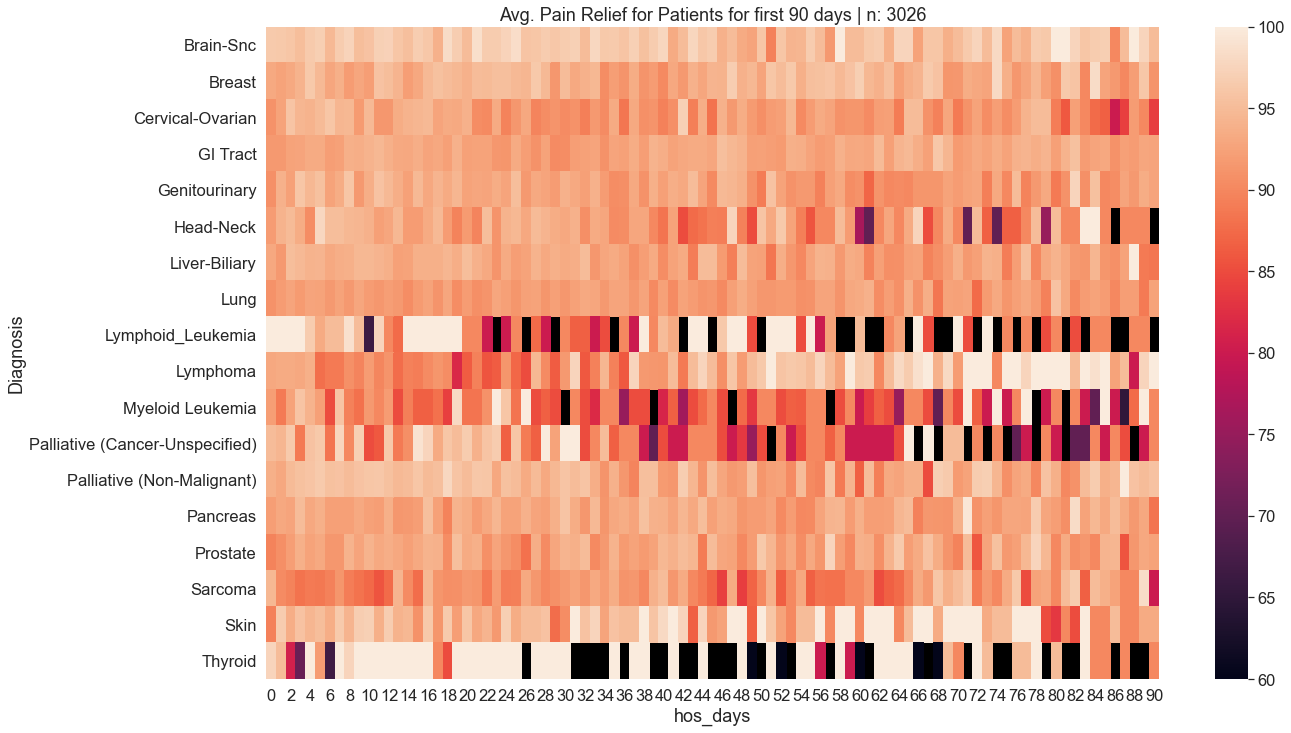

In [42]:
ax = plt.axes()
sns.heatmap(df_p4, annot=False, fmt='g', ax=ax)
ax.set_facecolor('xkcd:black')
ax.set_title('Avg. Pain Relief for Patients for first 90 days | n: ' + str(p_num))
plt.show()

In [43]:
s_time = 90
df_p6 = df_pa[df_pa['survival_time_days'] >= s_time]
df_p6 = df_p6[df_p6['hos_days'] <= s_time]
p_num = len(df_p6.IDEHR.unique())
df_p6 = df_p6[['Diagnosis', 'hos_days', 'pain_relief']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_p6 = df_p6[df_p6['hos_days'] <= s_time]
df_p6 = df_p6.pivot(index='Diagnosis', columns='hos_days', values='pain_relief')
df_p6

hos_days,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc,NaN,90.000000,100.000000,NaN,NaN,100.000000,95.000000,95.000000,93.333333,90.000000,...,100.000000,97.500000,96.000000,96.666667,97.000000,90.000000,95.000000,100.000000,97.500000,95.000000
Breast,60.000000,80.000000,90.000000,94.166667,93.333333,88.333333,90.000000,92.500000,85.000000,93.571429,...,96.250000,95.833333,90.000000,98.333333,93.500000,92.727273,90.000000,92.142857,96.111111,91.111111
Cervical-Ovarian,NaN,90.000000,97.500000,90.000000,90.000000,95.000000,95.000000,92.500000,96.666667,95.714286,...,86.000000,91.250000,90.000000,87.500000,86.666667,80.000000,84.000000,92.000000,90.000000,83.750000
GI Tract,83.333333,90.000000,81.000000,87.500000,78.125000,90.000000,85.555556,90.277778,90.769231,84.000000,...,94.375000,95.217391,93.043478,92.500000,93.437500,90.555556,92.045455,91.428571,92.857143,92.750000
Genitourinary,NaN,95.000000,90.000000,87.500000,90.000000,93.750000,92.500000,90.357143,96.666667,92.500000,...,91.000000,97.500000,90.909091,95.555556,90.000000,90.555556,92.777778,91.666667,93.571429,92.727273
Head-Neck,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,90.000000,90.000000,NaN,NaN,90.000000,NaN,90.000000,90.000000,90.000000,NaN
Liver-Biliary,90.000000,60.000000,90.000000,92.500000,85.000000,90.000000,90.000000,90.000000,90.000000,95.000000,...,91.250000,87.500000,90.555556,93.571429,90.000000,90.833333,92.500000,100.000000,88.750000,88.571429
Lung,92.857143,96.000000,98.333333,83.181818,91.250000,89.375000,90.000000,92.500000,88.461538,90.714286,...,93.947368,91.000000,91.956522,92.608696,93.055556,91.333333,92.142857,93.235294,88.888889,92.500000
Lymphoid_Leukemia,100.000000,100.000000,NaN,100.000000,100.000000,90.000000,90.000000,NaN,100.000000,90.000000,...,NaN,85.000000,NaN,90.000000,90.000000,NaN,NaN,90.000000,90.000000,NaN


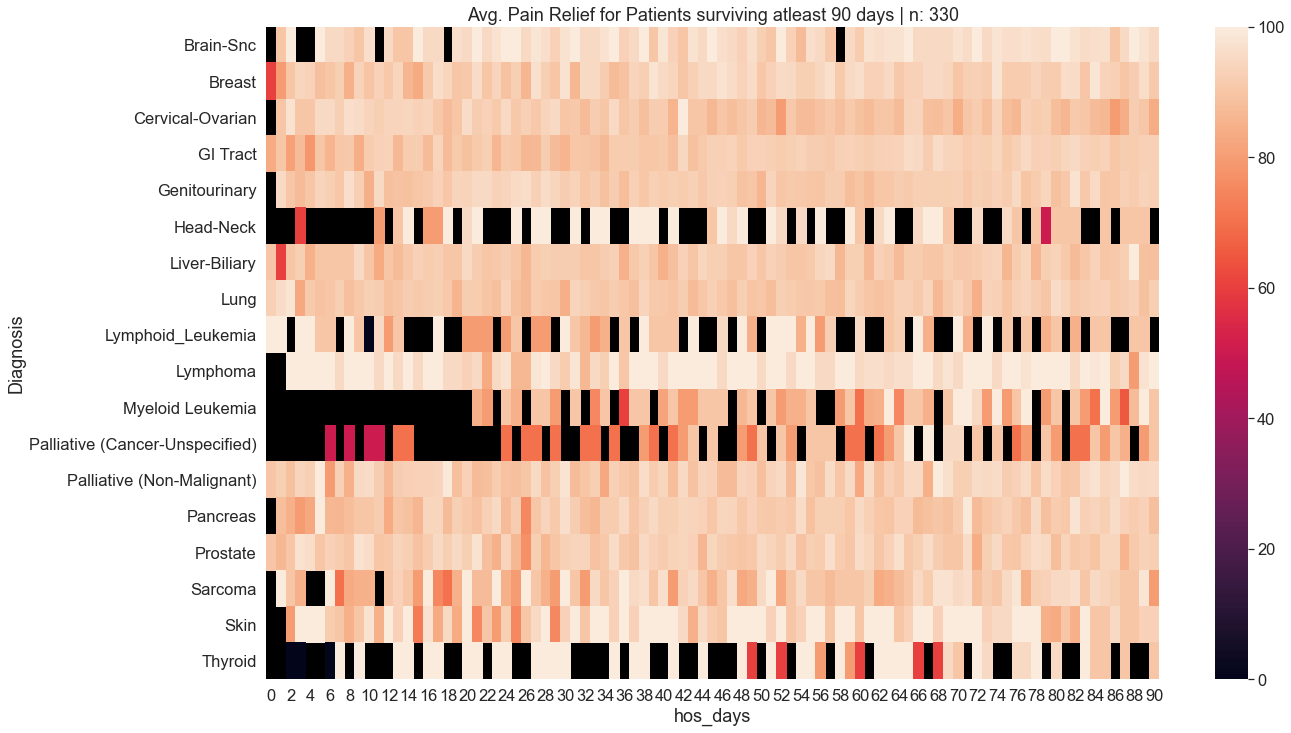

In [44]:
ax = plt.axes()
sns.heatmap(df_p6, annot=False, fmt='.2g', ax=ax)
ax.set_facecolor('xkcd:black')
ax.set_title('Avg. Pain Relief for Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num))
plt.show()